# Exercices

## **Préliminaires**: Clone de votre repo et imports

In [1]:
# ! git clone https://github.com/XXXXXXX/exam_2025_session2.git
# ! cp exam_2025_session2/utils/utils.py .


import copy
import numpy as np
import torch
import matplotlib.pyplot as plt


In [3]:
! git clone https://github.com/nanopiero/ML_S5_etudiants
import sys
sys.path.append('ML_S5_etudiants/practicals/P5')

from utils_P5 import gen_proba, voir_batch2D, UNet, make_batch
# from utils import gen_dr, gen_d, gen_dr_train, gen_dr_test, gen_ex2, voir_batch2D, UNet, make_batch

Cloning into 'ML_S5_etudiants'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 297 (delta 39), reused 22 (delta 22), pack-reused 245 (from 1)
Receiving objects: 100% (297/297), 20.38 MiB | 30.15 MiB/s, done.
Resolving deltas: 100% (120/120), done.


\

---

\

\

**Exercice 1** *Une segmentation dans un contexte faiblement supervisé*

La fonction *gen_dr* fournit permet de synthétiser des disques mêlés à des rectangles. Ici, les disques sont considérés comme du bruit, et le processus de corruption non en une somme (image = image_disques + image_rectangles) mais en une substitution (voir ci-dessous).
Elle fournit aussi une cible idéale, qui, en pratique, n'est pas disponible.


In [4]:
def gen_dr(n):
  discs = make_batch(n, rec = 0., noisy_rec= 0., disc = 0.0003)
  rectangles = make_batch(n, rec = 0.002, noisy_rec= 0., disc = 0.)
  ideal_targets = rectangles > 0
  rectangles[discs > 0 ] = discs[discs > 0]
  return  rectangles, ideal_targets


def gen_d(n):
  discs = make_batch(n, rec = 0., noisy_rec= 0., disc = 0.0003)
  return  discs


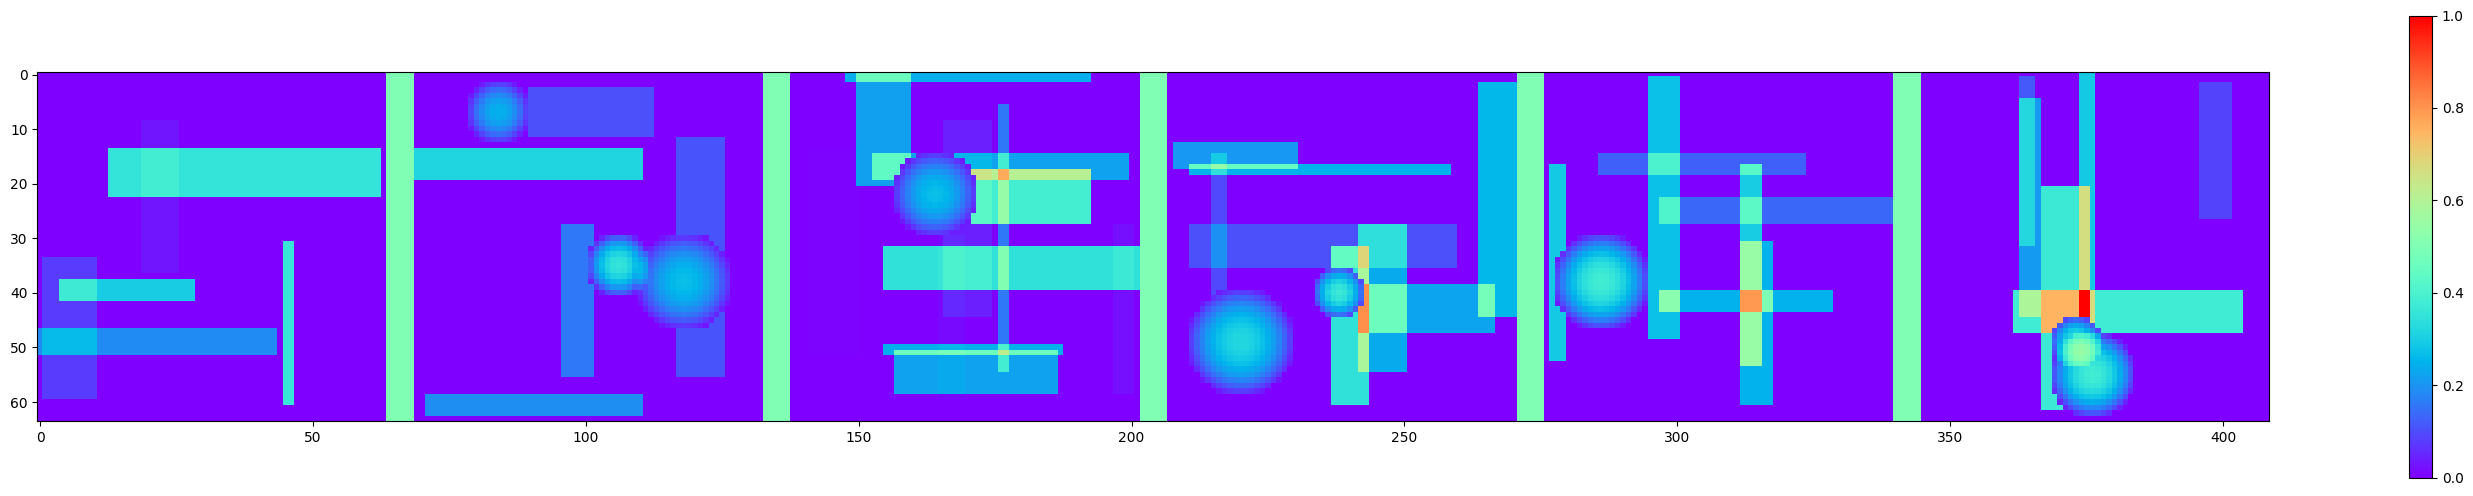

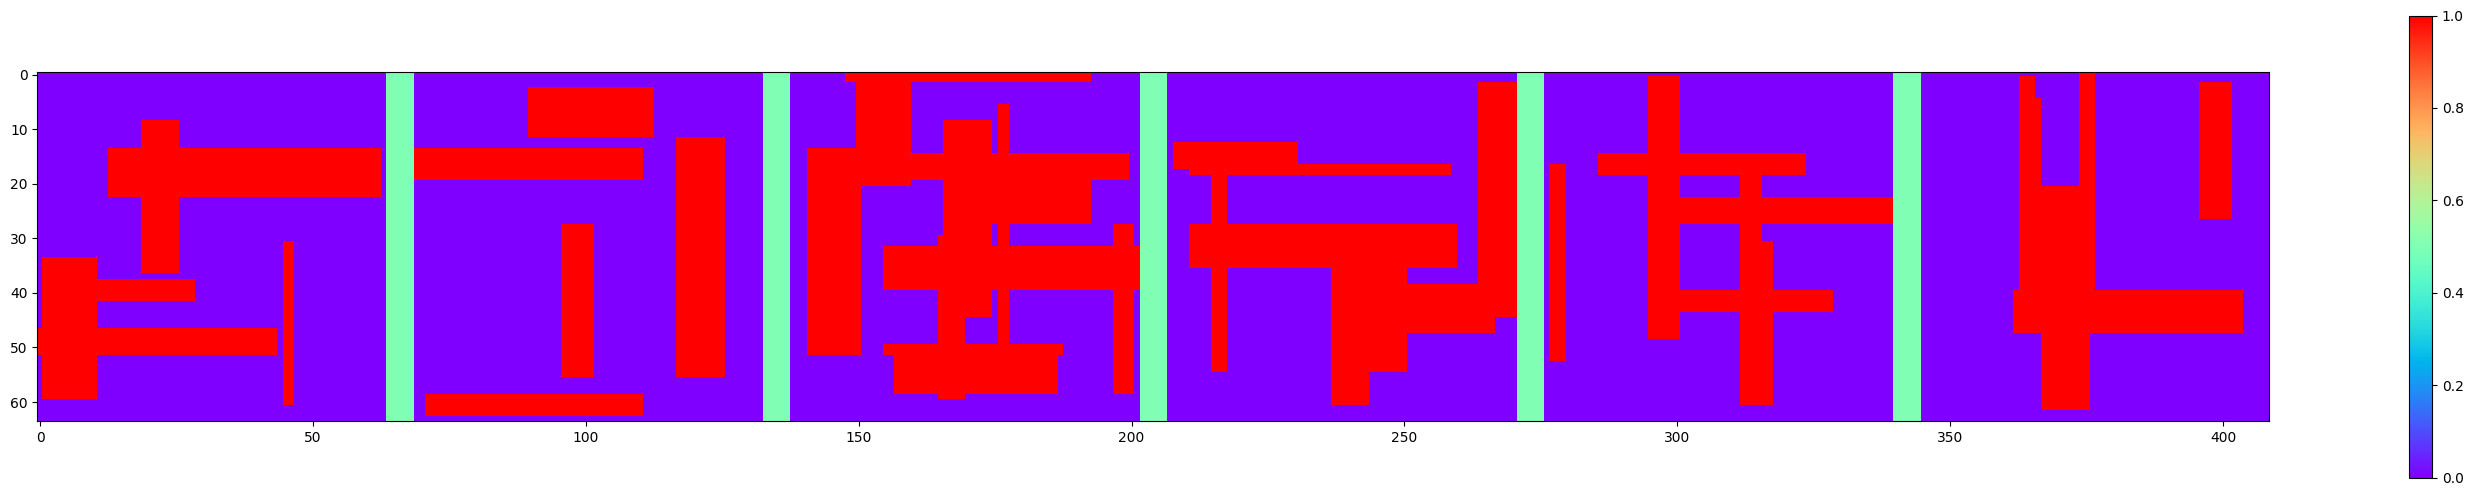

In [5]:
input, ideal_targets = gen_dr(6)
# Inputs
fig0 = plt.figure(0, figsize=(36, 6))
voir_batch2D(input, 6, fig0, k=0, min_scale=0,max_scale=1)

# ideal targets
fig1 = plt.figure(0, figsize=(36, 6))
voir_batch2D(ideal_targets, 6, fig1, k=0, min_scale=0,max_scale=1)

On dispose aussi d'une fonction *gen_d* qui synthétise des images comportant des disques :

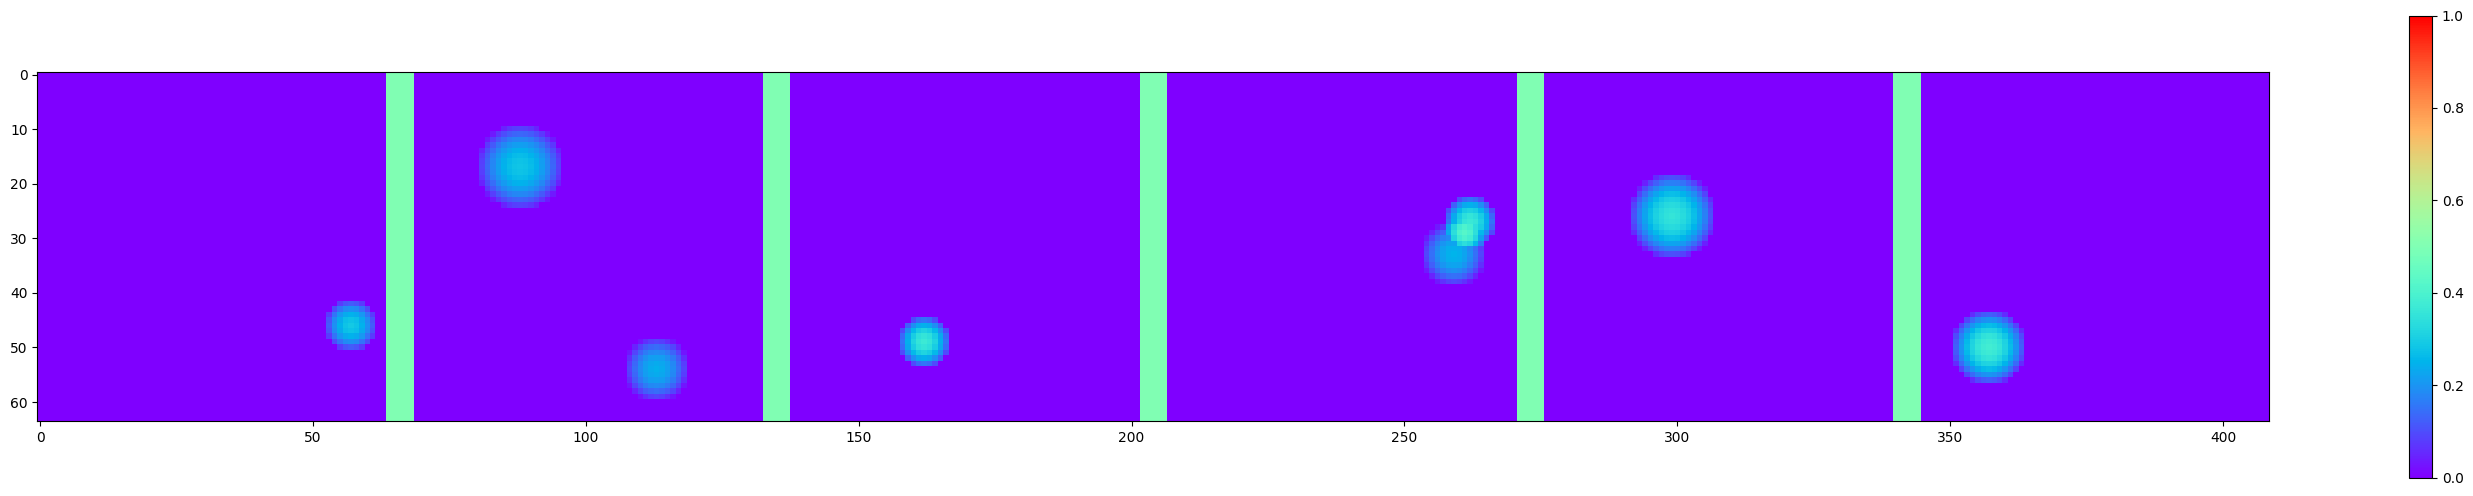

In [6]:
discs = gen_d(6)
# Discs
fig2 = plt.figure(0, figsize=(36, 6))
voir_batch2D(discs, 6, fig2, k=0, min_scale=0,max_scale=1)


**Q1** Rappeler ce qu'est la supervision faible. En quoi ce problème peut-il entrer dans cette catégorie ?

**Q2** Utiliser un UNet pour dire, pour une image produite par gen_dr, où sont les pixels qui étaient affectés par des rectangles **avant** corruption. Entraînez-le sur une cinquantaine d'époques. Utilisez la cible idéale pour contrôler la convergence. Visualiser quelques sorties après entraînement.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Initialize model and optimizer
model = UNet(1, 2, 16)  # Output channels = 2 for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
model = model.cuda()

# Define the loss function correctly
def criterion(output, target):
    return F.cross_entropy(output, target)

nepochs = 40
nbatches = 100
batchsize = 32

train_losses = []

for epoch in range(nepochs):
    print(f"Epoch {epoch}")

    epoch_losses = []

    for i in range(nbatches):  # nbatches = dataset_size / batchsize

        # Generate input data
        image, _ = gen_dr(batchsize)
        image = image.cuda()
        noise = gen_d(batchsize).cuda()
        noise2 = gen_d(batchsize).cuda()

        # Construct input
        input = image + noise + noise2  # Adding two noise images

        # Create target labels (binary segmentation)
        target = (image > 0).long()

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(input)  # Ensure model is used here

        # Compute loss
        loss = criterion(output, target)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Store loss
        epoch_losses.append(loss.item())  # Store as float, not tensor

        # Cleanup unnecessary references
        del target, input, loss

    # Compute average loss for epoch
    epoch_loss = np.mean(epoch_losses)
    train_losses.append(epoch_loss)

    print(f'Epoch loss: {epoch_loss:.4f}')


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:


# Put model in evaluation mode
fcn.eval()

# Generate input sample
input = gen1_NES(6)  # Assuming this function generates 6 input samples

# Forward pass
output = fcn(input.cuda())

# Apply softmax to output to convert logits to probabilities
output_probs = F.softmax(output, dim=1)  # Softmax over class dimension

# Visualization
fig = plt.figure(0, figsize=(36, 6))
voir_batch2D(input, 6, fig, k=0, min_scale=0, max_scale=1)

fig2 = plt.figure(2, figsize=(36, 6))  # Corrected figure index
voir_batch2D(output_probs.detach().cpu(), 6, fig2, k=0, min_scale=0, max_scale=1)

plt.show()  # Ensure figures display properly



\

**Exercice 2** *Une régression quantile*

La fonction *gen* fournit permet de synthétiser des entrées / cibles à la volée :  




In [ ]:

def gen_ex2(n):
  target1 = make_batch(n, rec = 0., noisy_rec= 0., disc = 0.0015)
  target2 = make_batch(n, rec = 0.0015, noisy_rec= 0.0015, disc = 0.)
  m = torch.normal(target1.mean(), 1)
  input = target1 + target2
  target = m
  return  input, target


# sampling (x,y) :

input, target = gen_ex2(6, mySeed)
# Inputs
fig0 = plt.figure(0, figsize=(36, 6))
voir_batch2D(input, 6, fig0, k=0, min_scale=0,max_scale=1)

# Targets
print(targets)

Cloning into 'ML_S5_etudiants'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 297 (delta 39), reused 22 (delta 22), pack-reused 245 (from 1)
Receiving objects: 100% (297/297), 20.38 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (120/120), done.


NameError: name 'mySeed' is not defined

**Q1** Définir un Loader à partir du Dataset précédent (2 workers)

**Q2** Entraîner un ResNet18 à prédire la médiane conditionnelle à l'image d'entrée.

**Q3** Modifier votre ResNet18 de manière à prédire aussi les premier et troisième quartiles. L'écart interquartile dépend-il de l'image d'entrée ?

**Q4 (Bonus)** On fait l'hypothèse que la sortie ne dépend que des disques. On suppose aussi qu'on ait accès, comme à l'exercice 1 à un jeu de données d'images ne comportant que des disques. Que feriez-vous pour tester cette hypothèse ? Rpondez sans code, mais avec précision.

\

---

\

**Exercice 3** *Nettoyage et adaptation de domaine*

Contrairement à l'exercice 1, on se place dans le cas où des entrées et des cibles idéales sont disponibles pour une tâche de débruitage :

In [ ]:
def gen_dr_train(n):
  discs = make_batch(n, rec = 0., noisy_rec= 0., disc = 0.0005)
  rectangles = make_batch(n, rec = 0.001, noisy_rec= 0.001, disc = 0.)
  ideal_targets = rectangles > 0
  rectangles[discs > 0 ] = discs[discs > 0]
  return  rectangles, targets



Par contre, on suppose que les images disponibles à l'entraînement ne suivent pas les mêmes statistiques que les données test, échantillonnables avec la fonction gen_dr_test suivante :

In [ ]:
def gen_dr_test(n):
  discs = make_batch(n, rec = 0., noisy_rec= 0., disc = 0.001)
  rectangles = make_batch(n, rec = 0.002, noisy_rec= 0.002, disc = 0.)
  ideal_targets = rectangles > 0
  rectangles[discs > 0 ] = discs[discs > 0]
  return  rectangles, targets

Ce qu'on voit en effet, c'est que les images test sont plus chargées en figures géométriques. \
Dans la réalité, ce cas de figure se présente lorsque :
 - les données propres au test (ie, représentatives des données à traiter en inférence) sont en trop petit nombre pour être exploitées à l'entraînement
 - un large jeu de données dont les statistiques sont différentes de celles des données d'inférence est disponible.

**Q1** A l'aide d'internet, décrire ce que recouvre le mot clef "domain adaptation" et faites le lien avec l'énoncé.

**Q2** Sur des entraînements courts avec des UNet, montrer que les performances sur le jeu de test sont plus faibles lorsque les données sont entraînées avec gen_dr_train que dans une situation idéale.

**Q3 (Bonus) ** Proposez une méthode simple pour améliorer les performances.

\

---

\

**Exercice 4** Un article important

Parcourir rapidement l'article : https://arxiv.org/abs/1505.04597.
Préciser :
- la nature du problème de Machine Learning abordé.
- quelles méthodes d'augmentation de données sont utilisées.
- l'origine du déséquilibre entre les classes cibles et la façon dont elle il est traité (de manière synthétique).